# Used cars price prediction with two different models

Dataset taken from https://www.kaggle.com/austinreese/craigslist-carstrucks-data

### Basic script

#### Load packages and set parameters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

#### Load and pre-process data

In [3]:
data = pd.read_csv('vehicles.csv')
df = data.copy()
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [4]:
df.describe(include='all')

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
count,458213.000000,4.582130e+05,458213,458213,458213,4.582130e+05,457163.000000,439993,453367,265273,287073,454976,4.029100e+05,455636,455771,270664,324025,136865,345475,317370,458185,458143,458213,450765.000000,450765.000000,458185
unique,NaN,NaN,458213,405,413,NaN,NaN,43,31520,6,8,5,NaN,6,3,133620,3,4,13,12,285404,384347,51,NaN,NaN,423805
top,NaN,NaN,https://oregoncoast.craigslist.org/ctd/d/newpo...,columbus,https://bend.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1C4HJWDG6HL702229,4wd,full-size,sedan,white,https://images.craigslist.org/00c0c_1gCUGosl6w...,"👉 BAD Credit, NO Credit - OKAY! We FINANCE ANY...",ca,NaN,NaN,2020-11-22T06:14:19-0500
freq,NaN,NaN,1,3818,2989,NaN,NaN,79666,8370,115685,105677,399399,NaN,439626,396322,194,139693,69736,92364,82786,194,247,51856,NaN,NaN,7
mean,229106.000000,7.235233e+09,NaN,NaN,NaN,4.042093e+04,2010.746067,NaN,NaN,NaN,NaN,NaN,1.016698e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.531925,-94.375824,NaN
std,132274.843786,4.594362e+06,NaN,NaN,NaN,8.194599e+06,8.868136,NaN,NaN,NaN,NaN,NaN,3.228623e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.857378,18.076225,NaN
min,0.000000,7.208550e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.607549,-164.091797,NaN
25%,114553.000000,7.231953e+09,NaN,NaN,NaN,4.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,4.087700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.600000,-110.890427,NaN
50%,229106.000000,7.236409e+09,NaN,NaN,NaN,1.099500e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.764100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.244500,-88.314889,NaN
75%,343659.000000,7.239321e+09,NaN,NaN,NaN,2.149500e+04,2016.000000,NaN,NaN,NaN,NaN,NaN,1.340000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.484503,-81.015022,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [6]:
len(df)

458213

In [7]:
df.drop(columns=['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'VIN', 'size', 'image_url', 'description', 'state', 'lat', 'long'], inplace=True)

In [8]:
from sklearn.impute import SimpleImputer

imr = SimpleImputer(strategy='mean')
imr = imr.fit(df[['odometer']])
imputed_data = imr.transform(df[['odometer']])
df['odometer'] = pd.DataFrame(imputed_data)
df['odometer'].head()

0     32742.0
1     93600.0
2     87046.0
3    190000.0
4    116000.0
Name: odometer, dtype: float64

In [9]:
df.dropna(inplace=True)

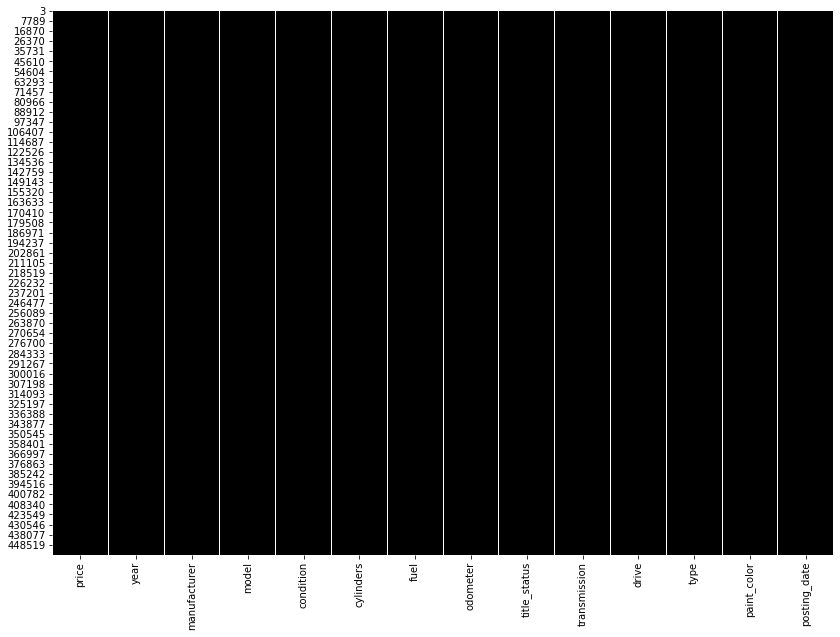

In [10]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.isnull(), cbar=False, cmap="Greys_r")
plt.show()

In [11]:
df['price'].value_counts

<bound method IndexOpsMixin.value_counts of 3          2000
4         19500
6         39990
7         41990
11        36990
          ...  
458206     5300
458208    14995
458209    17895
458210    17900
458211     1300
Name: price, Length: 140601, dtype: int64>

In [12]:
df = df[df['price'] > 100]
df = df[df['price'] < 300000]

In [13]:
len(df)

134982

In [14]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,posting_date
3,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,2020-12-01T15:54:45-0600
4,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,2020-12-01T12:53:56-0600
6,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,rwd,coupe,blue,2020-11-30T13:34:00-0600
7,41990,2012.0,chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,rwd,coupe,red,2020-11-29T07:39:33-0600
11,36990,2013.0,bmw,m3 coupe 2d,good,8 cylinders,gas,50956.0,clean,other,rwd,coupe,black,2020-11-27T07:21:42-0600


In [15]:
from sklearn import preprocessing

def encode_features(dataframe):
    result = dataframe.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# 'description'
encoded_df, encoders = encode_features(df) 
encoded_df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,posting_date
3,2000,1974.0,7,2488,2,3,2,190000.0,0,0,2,8,1,113089
4,19500,2005.0,13,5794,0,6,0,116000.0,1,0,0,8,1,110498
6,39990,2012.0,13,8311,2,6,2,9692.0,0,2,2,3,1,100207
7,41990,2012.0,7,2713,2,6,2,2778.0,0,2,2,3,8,91292
11,36990,2013.0,4,7744,2,6,2,50956.0,0,2,2,3,0,77312


Features' hists plotted


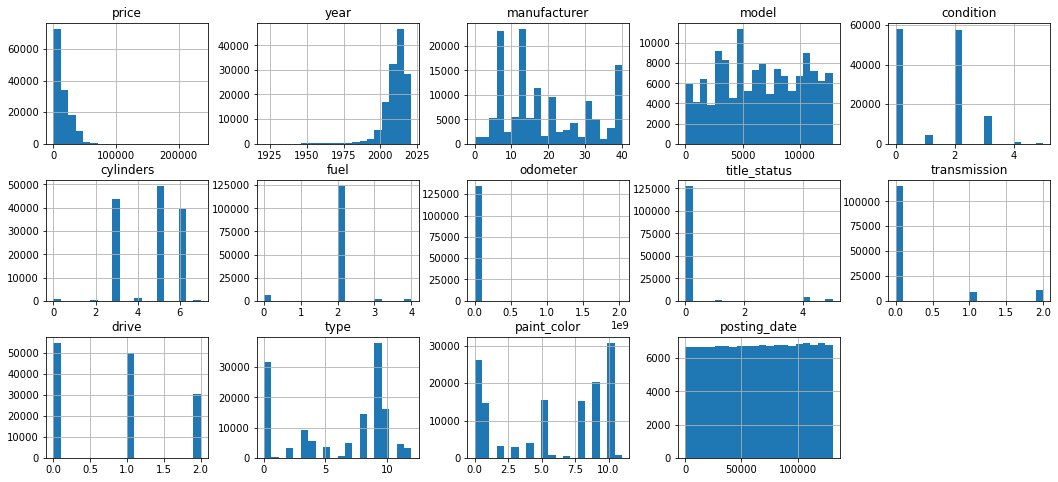

In [16]:
encoded_df.hist(figsize=(18, 8), layout=(3,5), bins=20)
print('Features\' hists plotted')

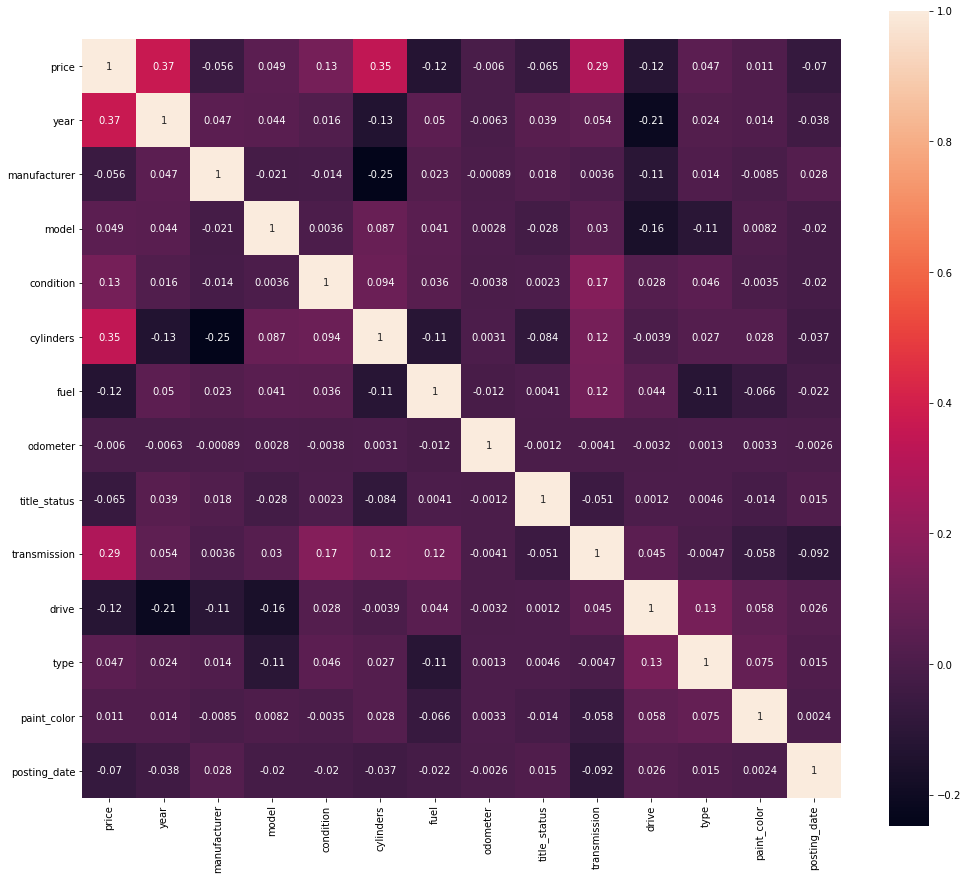

In [17]:
plt.subplots(figsize=(17, 15))
sns.heatmap(encoded_df.corr(), square = True, annot=True)
plt.show()

#### Model estimation

In [18]:
y = np.array(encoded_df['price'])
del encoded_df['price']
X = encoded_df.values
X.shape, y.shape

((134982, 13), (134982,))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

##### Linear regression

In [21]:
%%time
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

CPU times: user 104 ms, sys: 4.95 ms, total: 109 ms
Wall time: 39.3 ms


LinearRegression()

In [22]:
preds = linreg.predict(X_test)
print('R2 linreg: ', r2_score(y_test, preds))
print('MAE linreg: ', mean_absolute_error(y_test, preds))

R2 linreg:  0.35222200572800366
MAE linreg:  6758.956911575239


##### XGBoost

In [23]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

alg = xgb.XGBRegressor() 
grid = {'n_estimators': [50, 150], 
        'learning_rate': [0.01, 0.1],
        'max_depth': [4, 7],
        'reg_lambda': [0.5]}
gs = GridSearchCV(estimator=alg, param_grid=grid, cv=5, n_jobs=-1)
%time gs.fit(X_train, y_train)
print('Best score: ', gs.best_score_)
print('Best parameters: ', gs.best_params_)

CPU times: user 1min 46s, sys: 1.8 s, total: 1min 48s
Wall time: 1min 2s
Best score:  0.8654815528182235
Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'reg_lambda': 0.5}


In [24]:
xgb = gs.best_estimator_
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
preds = xgb.predict(X_test)
print('R2 xgb: ', r2_score(y_test, preds))
print('MAE xgb: ', mean_absolute_error(y_test, preds))

R2 xgb:  0.8553066121739652
MAE xgb:  2365.5661418318646


### Test cases

In order to test the model drift detection mechanism, we split the original data set into four groups (for simplicity, we are ignoring VINs ending in a letter and NULLs):

<ol>
    <li> Training set (1) - All VINs ending in 2, 3, 4, or 5. This data set allows us to train our model(s) with reasonable accuracy and consistency.</li>
    <li> Training set (2) - Append all VINs ending in 6 to training set (1.) and retrain the model. In expectation, the model and its predictions should be quite close to the model trained based on (1.) and not trigger the outlier detection mechanism.</li>
    <li> Training set (3) - Take all VINs ending in 7, 8, 9, or 0, with their sale prices artificially ultiplied by a factor of 10. When appending this data to (1.) and (2.) and retraining the model, the model parameters and its predictions should be quite different than those obtained previously, which in turn should trigger the outlier detection mechanism.</li>
    <li> Scoring set - All VINs ending in 1. We will use this data set for prediction purposes. In expectation, the average price predictions based on a model trained on data sets (1.) and (2.) should be quite close and not trigger the outlier detection mechanism. However, when the data from set (3.) is used for model training, we expect the average predictions to change substantially from those obtained previously, thus triggering the outlier detection mechanism.</li>
    </ol>

In [26]:
data['VIN'].describe()

count                270664
unique               133620
top       1C4HJWDG6HL702229
freq                    194
Name: VIN, dtype: object

In [27]:
data['last_digit'] = data['VIN'].str.slice(start=-1)

In [28]:
data['last_digit'].value_counts()

1    27985
9    27386
0    27383
8    27330
5    27197
7    26857
6    26829
4    26725
2    26501
3    26280
X       79
M        9
O        9
G        8
K        8
A        8
R        8
E        8
B        7
U        7
D        6
L        5
Y        5
N        4
S        4
T        4
Z        4
F        2
P        2
C        2
W        1
H        1
Name: last_digit, dtype: int64

In [29]:
train_1 = data[data['last_digit'].isin(['2', '3', '4', '5'])]
train_1.shape

(106703, 27)

In [30]:
train_2 = data[data['last_digit'] == '6']
train_2 = train_2.append(train_1)
train_2.shape

(133532, 27)

In [31]:
train_3 = data[data['last_digit'].isin(['7', '8', '9', '0'])]
train_3['price'] = train_3['price']*10
train_3 = train_3.append(train_2)
train_3.shape

<ipython-input-31-fa77eb101a37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_3['price'] = train_3['price']*10


(242488, 27)

In [32]:
scoring = data[data['last_digit'] == '1']
scoring.shape

(27985, 27)